In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [39]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [41]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [43]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine)

In [45]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [47]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [49]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [52]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurements.date)).first()
most_recent_date

('2017-08-23',)

Text(0, 0.5, 'Precipitation in Inches')

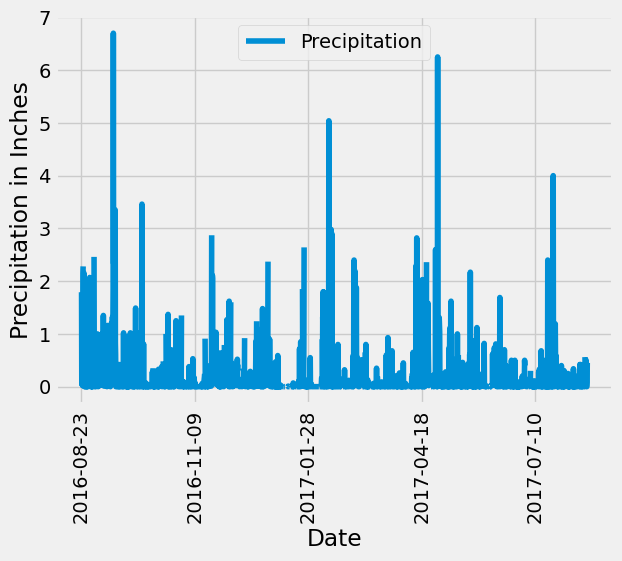

In [60]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
previous_year = dt.date(2017,8,23) - dt.timedelta(days=365)
# Calculate the date one year from the last date in data set.
results = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= previous_year).all()

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_df = pd.DataFrame(results, columns=("Date", "Precipitation"))
# Sort the dataframe by date
year_df = year_df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
year_df.plot(x="Date", y = "Precipitation", rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")
            

In [62]:
# Use Pandas to calculate the summary statistics for the precipitation data
year_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [68]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Stations.station)).all()

[(9,)]

In [76]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_rows = session.query(Measurements.station, func.count(Measurements.station)).\
    group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()
most_rows

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [84]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurements.tobs), func.max(Measurements.tobs), func.avg(Measurements.tobs)).\
    filter(Measurements.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temp')

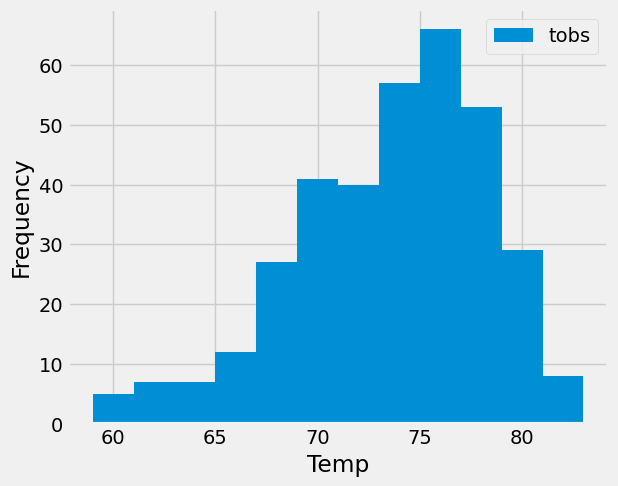

In [90]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import datetime as dt
from pandas.plotting import table
previous_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
results = session.query(Measurements.tobs).\
    filter(Measurements.station == "USC00519281").\
    filter(Measurements.date >= previous_year).all()
#convert to dataframe
station_df = pd.DataFrame(results, columns=["tobs"])
#check the work
station_df
#plot the work
station_df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temp")


# Close Session

In [92]:
# Close Session
session.close()